<a href="https://colab.research.google.com/github/LeoFernanndes/notebooks/blob/master/Hands_on_Machine_Learning_with_Sklearn_and_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. The Machine Learning Landscape

#2. End to End Machine Learning Project

#3. Classification

In [0]:
# Introduction to classification problems with MNIST dataset

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')

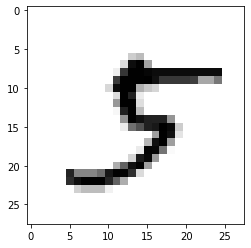

In [2]:
# getting only the features and target from mnist dataset
x, y = mnist['data'], mnist['target']

# random digit
some_digit = x[36011]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation= 'nearest')
plt.show()

In [3]:
## performing a very naive binnary classification
# split into train and test data
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# randomizing the data indexes
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# our first classifier has the mission to identify wheter a digit is a 9 or not. Binary classifier then.
# defining one array for train and the other for test considering true for nines and false for all the other digits
y_train = y_train.astype(int)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


from sklearn.linear_model import SGDClassifier

weight = {1: 0.1,
          0: 1}

sgd_clf = SGDClassifier(alpha=0.0001, average=False, class_weight= weight,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state= 42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
sgd_clf.fit(x_train, y_train_5)

y_real = y_test_5
y_pred = sgd_clf.predict(x_test)

# in order to see how the model performs, we're now going do perform cross validation to measure central tendencies

from sklearn.model_selection import cross_val_score


cross_validation = cross_val_score(sgd_clf, x_train, y_train_5, cv= 3, scoring= 'accuracy')
cross_validation

array([0.9622 , 0.95845, 0.95065])

In [4]:
# defining a dumb classifier to see that our model in terms of accuracy, performs very badly

from sklearn.base import BaseEstimator


class Base5Classifier(BaseEstimator):
  
  def fit(self, x, y= None):
    pass
  
  def predict(self, x):
    return np.zeros((len(x), 1), dtype= bool)

base = Base5Classifier()
cross_val_score(base, x_train, y_train_5, cv= 2, scoring= 'accuracy')

array([0.90933333, 0.90996667])

In [5]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


precision = precision_score(y_train_5, sgd_clf.predict(x_train))
recall = recall_score(y_train_5, sgd_clf.predict(x_train))
f1 = f1_score(y_train_5, sgd_clf.predict(x_train))
cm = confusion_matrix(y_train_5, sgd_clf.predict(x_train))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1: {}'.format(f1))
print(cm)

precision: 0.9801559177888023
recall: 0.5102379634753735
f1: 0.6711148853572728
[[54523    56]
 [ 2655  2766]]


In [0]:
from sklearn.model_selection import cross_val_predict


y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv= 3, method= 'decision_function')

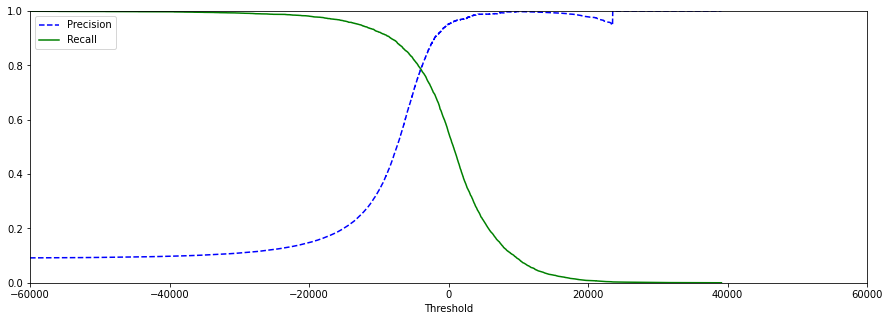

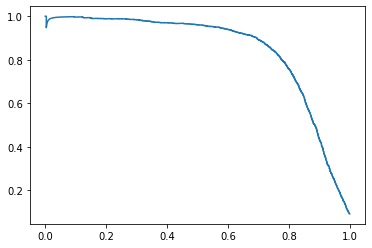

0.7860036832412522
0.7873086146467442
[[53417  1162]
 [ 1153  4268]]


In [18]:
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_threshold(precisions, recalls, thresholds):
  plt.figure(figsize= (15, 5))
  plt.plot(thresholds, precisions[:-1], 'b--', label= 'Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label= 'Recall')
  plt.xlabel('Threshold')
  plt.legend(loc= 'upper left')
  plt.ylim([0, 1])
  plt.xlim([-60000, 60000])
  
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

plt.plot(recalls, precisions)
plt.show()

y_train_pred_90 = y_scores > -4000
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))
print(confusion_matrix(y_train_5, y_train_pred_90))

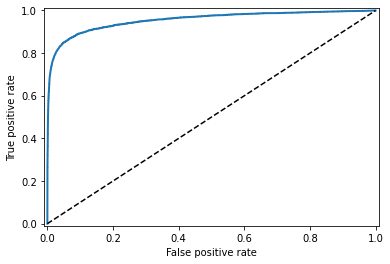

0.9549552008605159

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr, tpr, thresholds2 = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label= None):
  plt.plot(fpr, tpr, linewidth= 2, label= label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1.01, -0.01, 1.01])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')

plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(y_train_5, y_scores)

In [0]:
# let's now call a random forest classifier and compare the results

from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state= 42, class_weight= weight)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv= 3, method= 'predict_proba') # returns an array with pairs of probabilities for 0 in the first column and 1 in the second

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


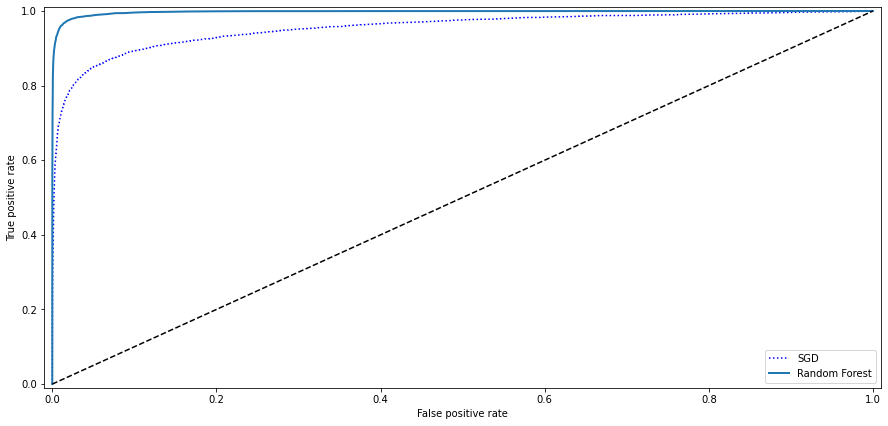

0.9975704775849269

In [10]:
y_scores_forest = y_probas_forest[:, 1] # probability for the class 1
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize= (15, 7))
plt.plot(fpr, tpr, 'b:', label= 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc= 'bottom right')
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

In [11]:
y_scores_forest_class = [1 if x > 0.5 else 0 for x in y_scores_forest]
print('f1: {}'.format(f1_score(y_train_5, y_scores_forest_class)))
print('precision: {}'.format(precision_score(y_train_5, y_scores_forest_class)))
print('recall: {}'.format(recall_score(y_train_5, y_scores_forest_class)))

f1: 0.9237246646431019
precision: 0.9843489148580968
recall: 0.8701346615015679


#4. Training Models

#5. Support Vector Machines

#6. Decision Trees